In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
ds_progs=pd.read_csv('ds_masters_usa.csv')

In [5]:
ds_progs.nunique()

Subject Name           199
University Name        276
Per Year Fees          339
About Program          434
Program Duration        22
University Location    163
Program Name            40
dtype: int64

In [18]:
ds_progs

,Subject Name,University Name,Per Year Fees,About Program,Program Duration,University Location,Program Name
0,Data Science for Business Leaders,Udacity,218 EUR / module,The Data Science for Business Leaders program ...,1 month,Online,Pre-Master / Part-time / Online
1,Data Science MicroMasters Program,edX - online learning platform,"1,163 EUR / full",EdX is an online learning platform trusted by ...,10 months,Online,Pre-Master / Part-time / Online
2,Data Science,George Mason University,"20,566 EUR / full",This Data Science Postgrad.Cert. program at Ge...,NaN,"Fairfax, Virginia, United States","Postgraduate Certificate / Full-time, Part-tim..."
3,Data Science - Earth Resources,Colorado School of Mines,"18,484 EUR / year",This Data Science - Earth Resources program at...,NaN,Online,Postgraduate Certificate / Part-time / Online
4,Data Science,The University of Texas at Arlington,"21,669 EUR / year",The Master of Science in Data Science degree p...,2 years,"Texas City, Texas, United States",M.Sc. / Full-time / On Campus
...,...,...,...,...,...,...,...
438,Information Technology Management - AI and Dat...,University of Wisconsin Milwaukee,"23,709 EUR / year",The Master of Science in Information Technolog...,1 year,"Milwaukee, Wisconsin, United States",M.Sc. / Full-time / On Campus
439,Data-Driven Decision Making Certificate,Temple University,"16,043 EUR / full",The Data-Driven Decision Making Certificate pr...,NaN,"Philadelphia, Pennsylvania, United States","Postgraduate Certificate / Full-time, Part-tim..."
440,Computer Information Technology - Data Analytics,Northern Arizona University,"13,508 EUR / year",The Computer Information Technology - Data Ana...,1 year,Online,Master / Part-time / Online
441,Datacenter Systems Engineering,Southern Methodist University,"33,215 EUR / year",Students entering the Datacenter Systems Engin...,1 year,"Dallas, Oregon, United States",M.Sc. / Full-time / On Campus


In [7]:
ds_progs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Subject Name         443 non-null    object
 1   University Name      443 non-null    object
 2   Per Year Fees        436 non-null    object
 3   About Program        443 non-null    object
 4   Program Duration     427 non-null    object
 5   University Location  443 non-null    object
 6   Program Name         443 non-null    object
dtypes: object(7)
memory usage: 24.4+ KB


In [12]:
fee_type=ds_progs['Per Year Fees'].str.split('/').str[1]

In [14]:
fee_type.unique()

array([' module', ' full', ' year', nan], dtype=object)

In [24]:
ds_progs['Per Year Fees'].str.split('/').str[1]

0       module
1         full
2         full
3         year
4         year
        ...   
438       year
439       full
440       year
441       year
442       year
Name: Per Year Fees, Length: 443, dtype: object

### get the fee column with normalized number per year

In [25]:
ds_progs.head()

,Subject Name,University Name,Per Year Fees,About Program,Program Duration,University Location,Program Name
0,Data Science for Business Leaders,Udacity,218 EUR / module,The Data Science for Business Leaders program ...,1 month,Online,Pre-Master / Part-time / Online
1,Data Science MicroMasters Program,edX - online learning platform,"1,163 EUR / full",EdX is an online learning platform trusted by ...,10 months,Online,Pre-Master / Part-time / Online
2,Data Science,George Mason University,"20,566 EUR / full",This Data Science Postgrad.Cert. program at Ge...,NaN,"Fairfax, Virginia, United States","Postgraduate Certificate / Full-time, Part-tim..."
3,Data Science - Earth Resources,Colorado School of Mines,"18,484 EUR / year",This Data Science - Earth Resources program at...,NaN,Online,Postgraduate Certificate / Part-time / Online
4,Data Science,The University of Texas at Arlington,"21,669 EUR / year",The Master of Science in Data Science degree p...,2 years,"Texas City, Texas, United States",M.Sc. / Full-time / On Campus


In [26]:
# 1-step : get the number from the column 'Per year fees'

In [65]:
fees_in_float=ds_progs['Per Year Fees'].str.split(' EUR').str[0].str.replace(',','').astype('float')

In [30]:
# 2-step : get the value in months, if the value is nan then, we will consider as year

In [ ]:
# at first, let's check what egs contains the column 'Program Duration' 

In [32]:
ds_progs['Program Duration'].str.split(' ').str[1].unique()

array(['month', 'months', nan, 'years', 'year', 'year,', 'days', 'years,'],
      dtype=object)

In [42]:
ds_progs['Program Duration'].str.split(' ').str[-1].unique()

array(['month', 'months', nan, 'years', 'year', 'days'], dtype=object)

In [49]:
ds_progs['Program Duration'].str.split(' ').str.len().unique()

array([ 2., nan,  4.])

In [51]:
# it happened the column has several complecated cases, such as: 1 year, 2 months, 1 year and 6 months, 2 months and 14 days, NaN and so on

In [52]:
import re

In [73]:
# it is in process.... following plot shows the fee per year distribution (! but not correct, cause it is not normalized by time)

In [67]:
ds_progs.insert(3, 'Fees in EUR', fees_in_float)

In [68]:
ds_progs

,Subject Name,University Name,Per Year Fees,Fees in EUR,About Program,Program Duration,University Location,Program Name
0,Data Science for Business Leaders,Udacity,218 EUR / module,218.0,The Data Science for Business Leaders program ...,1 month,Online,Pre-Master / Part-time / Online
1,Data Science MicroMasters Program,edX - online learning platform,"1,163 EUR / full",1163.0,EdX is an online learning platform trusted by ...,10 months,Online,Pre-Master / Part-time / Online
2,Data Science,George Mason University,"20,566 EUR / full",20566.0,This Data Science Postgrad.Cert. program at Ge...,NaN,"Fairfax, Virginia, United States","Postgraduate Certificate / Full-time, Part-tim..."
3,Data Science - Earth Resources,Colorado School of Mines,"18,484 EUR / year",18484.0,This Data Science - Earth Resources program at...,NaN,Online,Postgraduate Certificate / Part-time / Online
4,Data Science,The University of Texas at Arlington,"21,669 EUR / year",21669.0,The Master of Science in Data Science degree p...,2 years,"Texas City, Texas, United States",M.Sc. / Full-time / On Campus
...,...,...,...,...,...,...,...,...
438,Information Technology Management - AI and Dat...,University of Wisconsin Milwaukee,"23,709 EUR / year",23709.0,The Master of Science in Information Technolog...,1 year,"Milwaukee, Wisconsin, United States",M.Sc. / Full-time / On Campus
439,Data-Driven Decision Making Certificate,Temple University,"16,043 EUR / full",16043.0,The Data-Driven Decision Making Certificate pr...,NaN,"Philadelphia, Pennsylvania, United States","Postgraduate Certificate / Full-time, Part-tim..."
440,Computer Information Technology - Data Analytics,Northern Arizona University,"13,508 EUR / year",13508.0,The Computer Information Technology - Data Ana...,1 year,Online,Master / Part-time / Online
441,Datacenter Systems Engineering,Southern Methodist University,"33,215 EUR / year",33215.0,Students entering the Datacenter Systems Engin...,1 year,"Dallas, Oregon, United States",M.Sc. / Full-time / On Campus


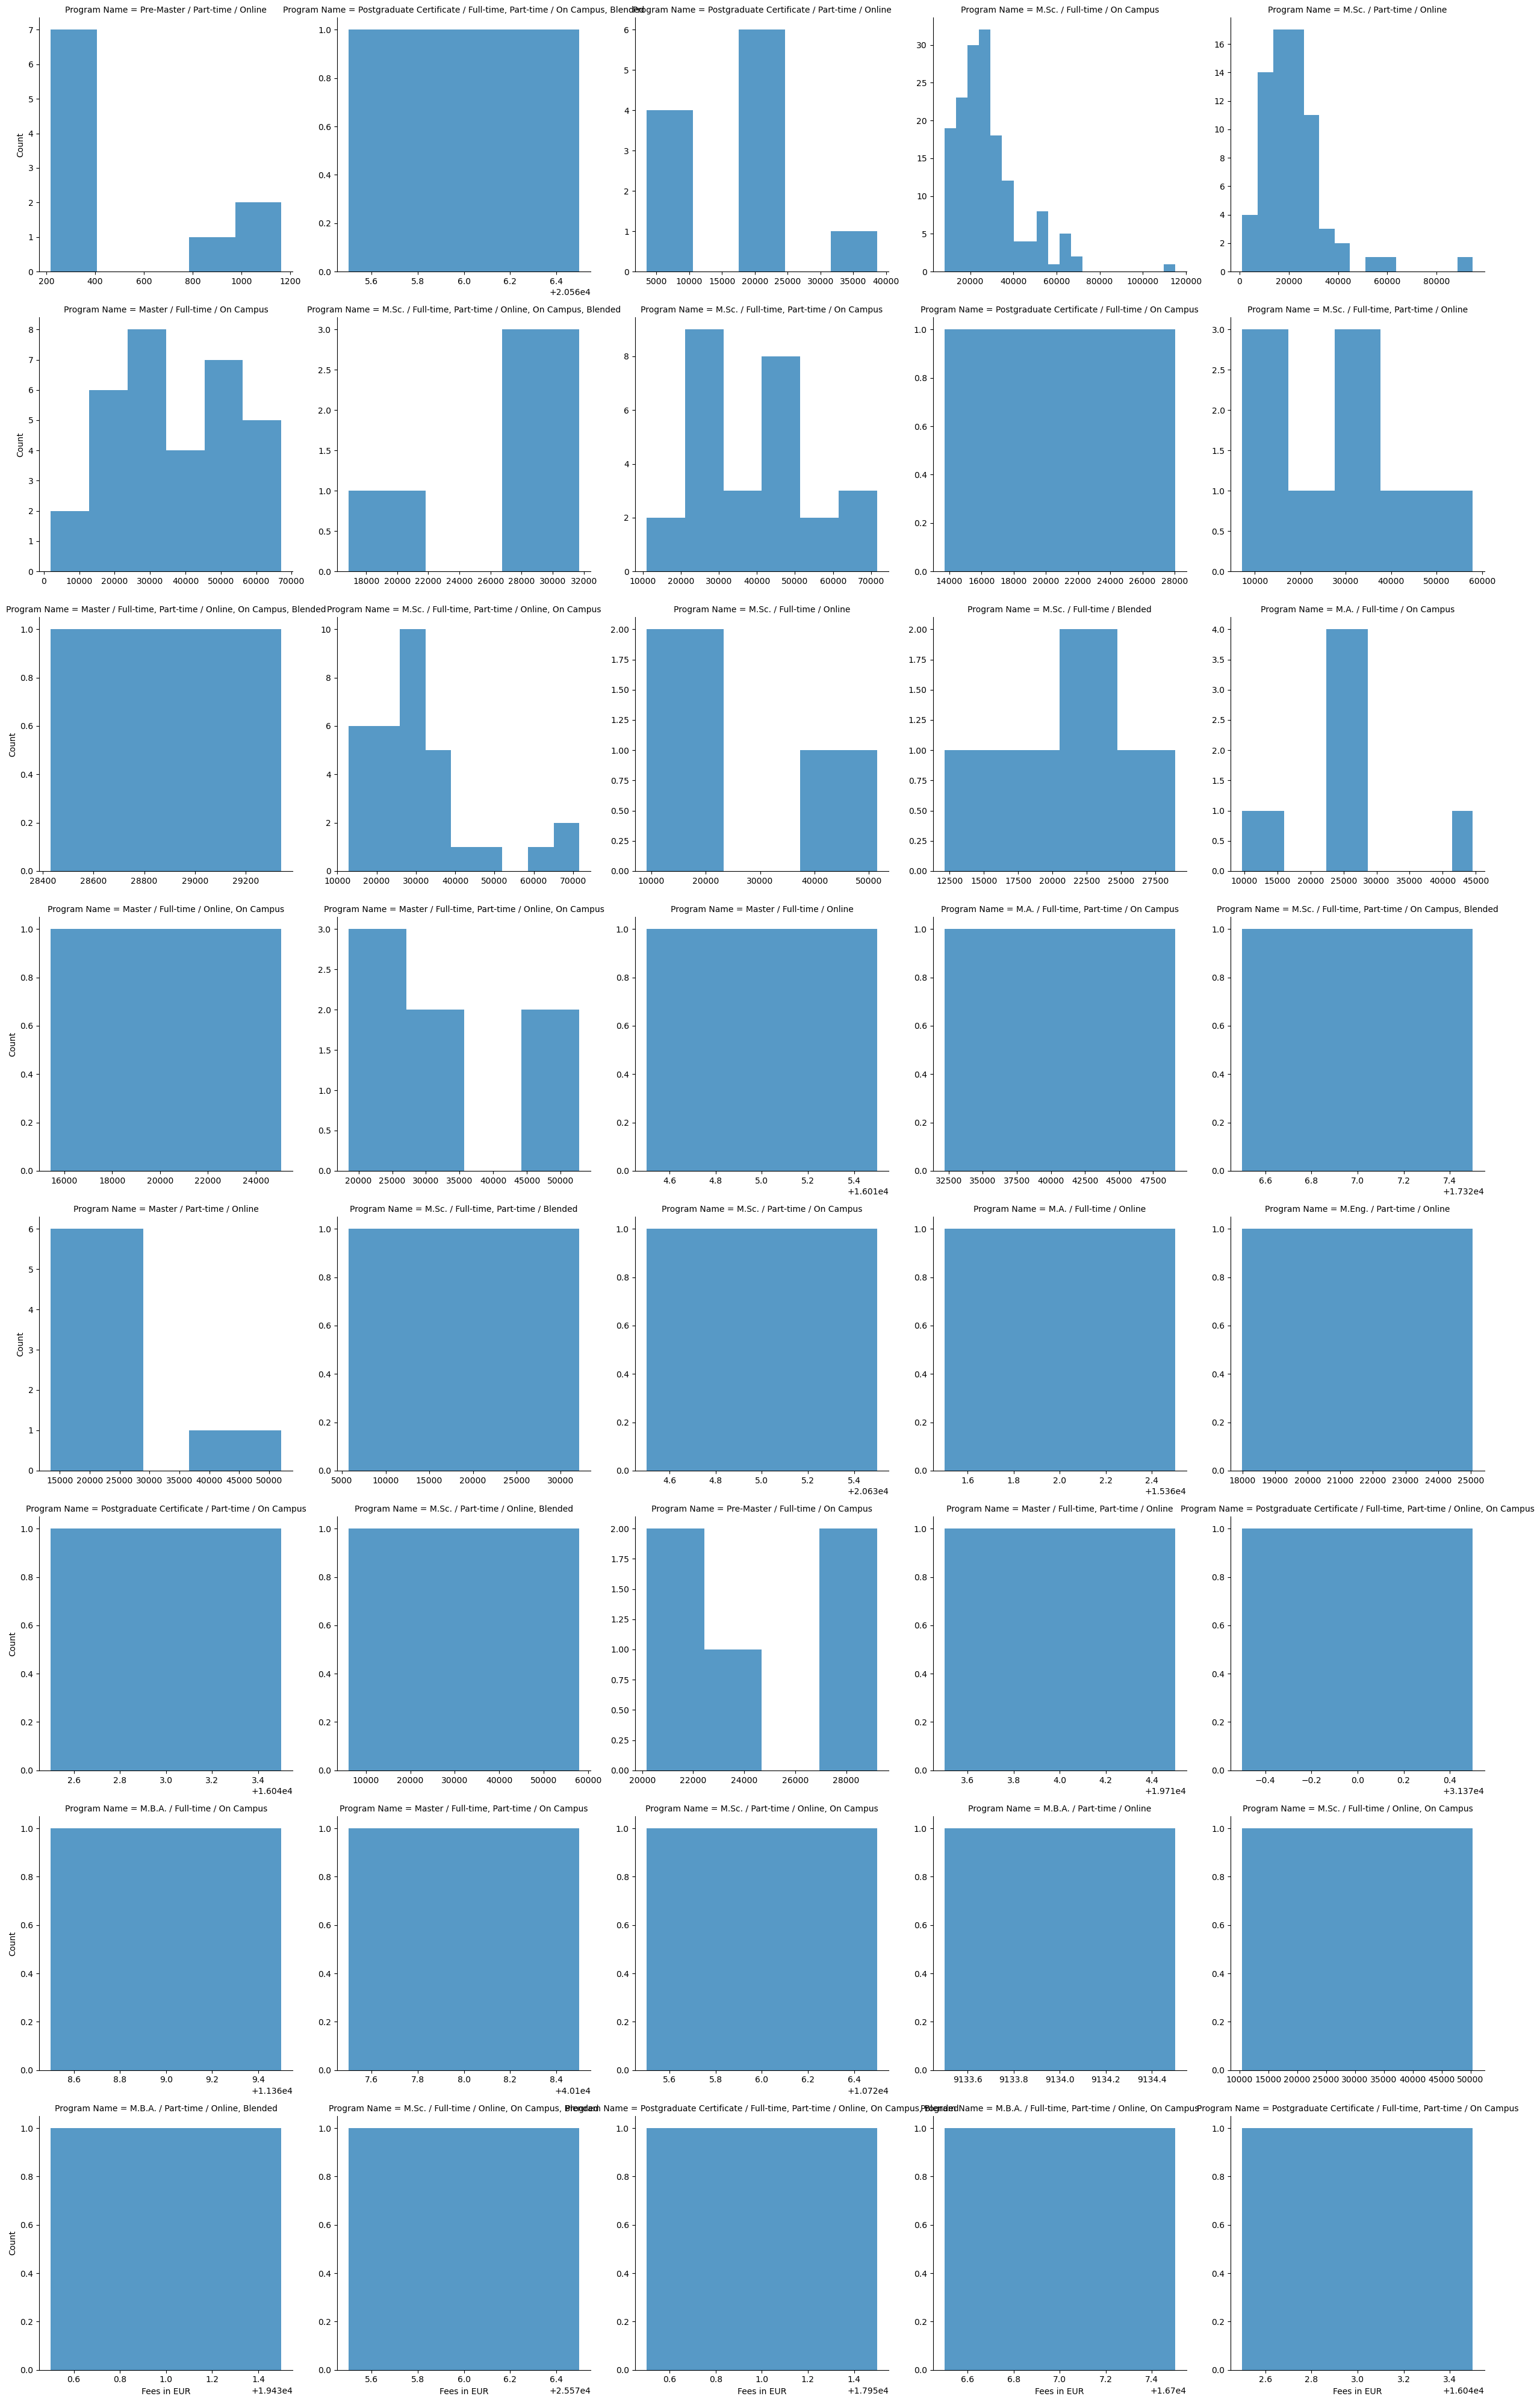

In [72]:
sns.displot(
    data=ds_progs,
    x='Fees in EUR',
    col='Program Name',
    col_wrap=5,   
    common_bins=False,
    facet_kws={'sharex':False, 'sharey':False}
)